## Environmental determinants of incident clonal hematopoiesis


In [1]:
# Load R Libraries : R-4.0 (at Broad)
library(data.table) # version 1.14.6
library(survival) # version 3.5-0
# install.packages("survminer")
library(survminer) # Version 0.4.9 
library(coxphw) # version 4.0.2
library(stringr) # version 1.5.0
library(dplyr) # version 1.1.0
library(tidyr) # version 1.3.0
# library(readxl)
library(ggplot2) # version 3.4.1 
library(ggpubr) # version 0.5.0
library(cowplot) # version 1.1.1
theme_set(theme_cowplot()) # version

ERROR: Error in library(survminer): there is no package called 'survminer'


In [2]:
# set working directory
setwd("/medpop/esp2/mesbah/projects/ch_progression/aric/epi/")

In [3]:
# Load data
## 0/1 CH status
aric_baseline_n_v05 <- fread("../pheno/aric_baseline_n_v05_N4189.pheno_ch_status_trajectory.23Mar2023.csv", header=T)
aric_baseline_n_v05$dAge <- aric_baseline_n_v05$Age - aric_baseline_n_v05$age_base
summary(aric_baseline_n_v05$dAge)
# CH variants
com.expansion.CH_v_b_v5_all <- fread("../pheno/combined.expansion.CH_v_b_v5_all.growth_rate.23Mar2023.csv", header=T)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   20.00   21.00   20.31   21.00   27.00 

,incident_CH_or_growingClones,incident_CH,incident_CHvaf05,incident_CHvaf10,incident_DNMT3A,incident_TET2,incident_ASXL1,incident_DTA,incident_SF,incident_DDR
incident_CH_or_growingClones,1.0000000,1.0000000,1.0000000,1.0000000,0.58660652,0.49814279,0.35516005,0.82917421,0.35998320,0.27941427
incident_CH,1.0000000,1.0000000,1.0000000,1.0000000,0.58660652,0.49814279,0.35516005,0.82917421,0.35998320,0.27941427
incident_CHvaf05,1.0000000,1.0000000,1.0000000,1.0000000,0.58660652,0.49814279,0.35516005,0.82917421,0.35998320,0.27941427
incident_CHvaf10,1.0000000,1.0000000,1.0000000,1.0000000,0.58660652,0.49814279,0.35516005,0.82917421,0.35998320,0.27941427
incident_DNMT3A,0.5866065,0.5866065,0.5866065,0.5866065,1.00000000,0.08294376,0.03171520,0.70745871,0.04744918,0.02783724
incident_TET2,0.4981428,0.4981428,0.4981428,0.4981428,0.08294376,1.00000000,0.08246008,0.60076976,0.17817919,0.03724106
incident_ASXL1,0.3551600,0.3551600,0.3551600,0.3551600,0.03171520,0.08246008,1.00000000,0.42832983,0.09631059,0.02559067
incident_DTA,0.8291742,0.8291742,0.8291742,0.8291742,0.70745871,0.60076976,0.42832983,1.00000000,0.16711486,0.05680041
incident_SF,0.3599832,0.3599832,0.3599832,0.3599832,0.04744918,0.17817919,0.09631059,0.16711486,1.00000000,0.02501538
incident_DDR,0.2794143,0.2794143,0.2794143,0.2794143,0.02783724,0.03724106,0.02559067,0.05680041,0.02501538,1.00000000


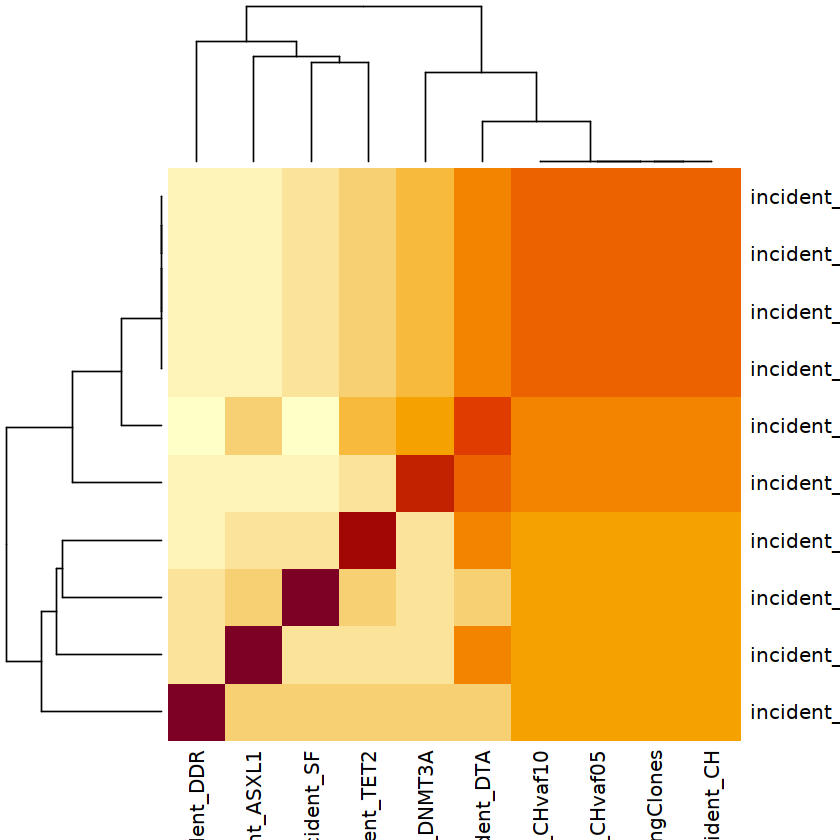

In [9]:
## Correlation of CH phenotypes
cor(aric_baseline_n_v05[,c("incident_CH_or_growingClones","incident_CH",
                                   "incident_CHvaf05","incident_CHvaf10",
                                   "incident_DNMT3A","incident_TET2",
                                   "incident_ASXL1","incident_DTA",
                                   "incident_SF","incident_DDR")], use = "complete")
heatmap(cor(aric_baseline_n_v05[,c("incident_CH_or_growingClones","incident_CH",
                                   "incident_CHvaf05","incident_CHvaf10",
                                   "incident_DNMT3A","incident_TET2",
                                   "incident_ASXL1","incident_DTA",
                                   "incident_SF","incident_DDR")], use = "complete"))

raw


,chol_base,ldl_base,hdl_base,tg_base
chol_base,1.0000000,0.9950540,0.9552919,0.8987943
ldl_base,0.9950540,1.0000000,0.9316353,0.8805659
hdl_base,0.9552919,0.9316353,1.0000000,0.7957814
tg_base,0.8987943,0.8805659,0.7957814,1.0000000


scaled


,chol_base_std,ldl_base_std,hdl_base_std,tg_base_std,nonHDL_base_std
chol_base_std,1.0000000,0.9950540,0.9552919,0.8987943,0.9957577
ldl_base_std,0.9950540,1.0000000,0.9316353,0.8805659,0.9967244
hdl_base_std,0.9552919,0.9316353,1.0000000,0.7957814,0.9240342
tg_base_std,0.8987943,0.8805659,0.7957814,1.0000000,0.9145346
nonHDL_base_std,0.9957577,0.9967244,0.9240342,0.9145346,1.0000000


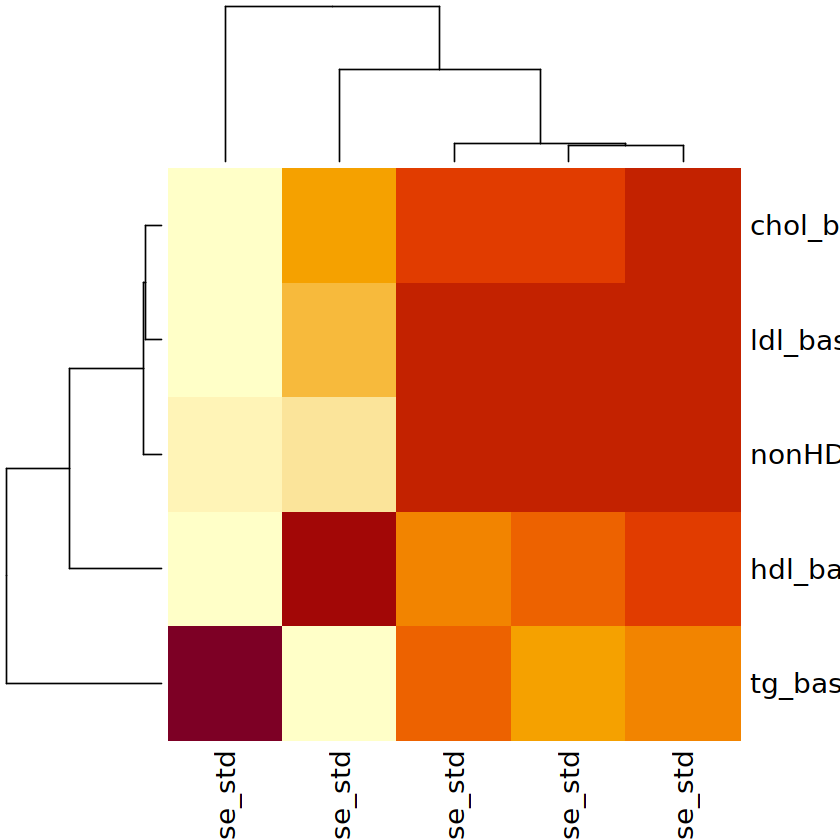

In [6]:
cat("raw\n")
cor(aric_baseline_n_v05[, c("chol_base","ldl_base","hdl_base", "tg_base")], use="complete")
cat("scaled\n")
cor(aric_baseline_n_v05[, c("chol_base_std","ldl_base_std","hdl_base_std", "tg_base_std", "nonHDL_base_std")], use="complete")
heatmap(cor(aric_baseline_n_v05[, c("chol_base_std","ldl_base_std","hdl_base_std", "tg_base_std", "nonHDL_base_std")], use="complete"))

In [8]:
summary(aric_baseline_n_v05)

   GWAS_ID            ARIC_ID          GWASID_Visit         cram_id         
 Length:4189        Length:4189        Length:4189        Length:4189       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   Visit.x             Gender               Age         CH_baseline    
 Length:4189        Length:4189        Min.   :67.00   Min.   :0.0000  
 Class :character   Class :character   1st Qu.:71.00   1st Qu.:0.0000  
 Mode  :character   Mode  :character   Median :75.00   Median :0.0000  
                                       Mean   :75.78   Mean   :0.1091  
                        

 ## Un-adjusted model: HR

In [1]:

cat(gsub(pattern = ", ", replacement = ",", x = toString(
  c("Dataset","Outcome", "Exposure","Beta", "HR", "SE", "Z", "P","lCI","uCI"))),
  file = "adj_vs_unadj.incident_chip.2023Mar30.csv", append = F, fill = T)


In [ ]:
cat(gsub(pattern = ", ", replacement = ",", x = toString(
  c("Dataset","Outcome", "Exposure","Beta", "HR", "SE", "Z", "P","lCI","uCI"))),
  file = "adj_vs_unadj.incident_chip.2023Mar30.csv", append = F, fill = T)

In [10]:
# # Unadjusted: cont. variable
# chd_is_base== CHD or IS
aric_baseline_n_v05$chd_is_base <- ifelse(aric_baseline_n_v05$chd_base==1 | aric_baseline_n_v05$is_base==1, 1,
                                          ifelse(aric_baseline_n_v05$chd_base==0 | aric_baseline_n_v05$is_base==0,0,NA))
table(aric_baseline_n_v05$chd_is_base, exclude = NULL)

 # ASCVD = c("chd", "is", "hf")
aric_baseline_n_v05$ascvd_base <- ifelse(aric_baseline_n_v05$chd_base==1 | 
                                           aric_baseline_n_v05$is_base==1 | 
                                           aric_baseline_n_v05$hf_base==1, 1,
                                          ifelse(aric_baseline_n_v05$chd_base==0 | 
                                                   aric_baseline_n_v05$is_base==0 | 
                                                   aric_baseline_n_v05$hf_base==0 | 
                                                 is.na( aric_baseline_n_v05$is_base) | 
                                                 is.na( aric_baseline_n_v05$hf_base),0,NA))
table(aric_baseline_n_v05$ascvd_base, exclude = NULL)
aric_baseline_n_v05$ascvd_base[is.na(aric_baseline_n_v05$ascvd_base)] <- 0
table(aric_baseline_n_v05$ascvd_base, exclude = NULL)

# exclude: too many missing value (637) gluc_base_std"
exposures <- c("age_base",  "bmi_base_std",   
               "chol_base_std","hdl_base_std", 
               "ldl_base_std","tg_base_std", "nonHDL_base_std",
               "Sex", "race_BW", "ever_smoke", 
               "chd_is_base","dm_126_base", "htn_5_base", "ascvd_base")

ch_phenotype <- c("incident_CH_or_growingClones","incident_CH",
                  "incident_DTA", "incident_SF","incident_DDR",
                  "incident_DNMT3A","incident_TET2",
                  "incident_ASXL1")


   0    1 <NA> 
3929  166   94 

In [10]:
for(i in exposures){
  
  for (j in ch_phenotype){
    
    # remove NA
    model1 <- summary(aric_baseline_n_v05 %>% filter(!is.na(get(i)) & !is.na(get(j))) %>%
                        coxph(Surv(dAge, get(j)) ~  get(i), data = .))
    cat( gsub(pattern = ", ", replacement = ",", x = toString(
      c("Unadjusted", paste0(j), paste0(i), 
        model1$coefficients[1:5], model1$conf.int[c(3,4)]) ) ), 
      file = "adj_vs_unadj.incident_chip.2023Mar30.csv", append = T, fill = T)
    
  }
}


ERROR: Error in aric_baseline_n_v05 %>% filter(!is.na(get(i)) & !is.na(get(j))) %>% : could not find function "%>%"


## Adjusted model:  
### Age: 
adjusted for Sex, Race, Smoking, batch(visit,center), bmi, statin, chol_base_std, t2d, htn, chd_is

In [ ]:
ch_phenotype <- c("incident_CH_or_growingClones","incident_CH",
                  "incident_DTA", "incident_SF","incident_DDR",
                  "incident_DNMT3A","incident_TET2",
                  "incident_ASXL1")
#
for (j in ch_phenotype){
  model2 <- summary( aric_baseline_n_v05 %>% 
                       filter(!is.na(age_base) & !is.na(get(j))) %>% 
                       coxph( Surv(dAge, get(j) ) ~  age_base + 
                                Sex + race_BW + ever_smoke + 
                                v2_vs_other + Center + bmi_base_std + 
                                chol_med_base + chol_base_std + dm_126_base + 
                                htn_5_base + chd_is_base, data = .) )
  
  cat( gsub(pattern = ", ", replacement = ",", x = toString(
    c("Adjusted", paste0(j), "age_base", 
      model2$coefficients[1,1:5], model2$conf.int[1,c(3,4)]) ) ), 
    file = "final_adj_vs_unadj.incident_chip.2023Mar30.csv", 
    append = T, fill = T)
}


## Adjusted model:  
### all exposures: 
adjusted for Sex, Race, Smoking, batch(visit,center), bmi, statin, chol_base_std, t2d, htn, chd_is

In [ ]:
rm(i,j,k, ch_phenotype, exposures, model1, model2)

# Outcomes
ch_phenotype <- c("incident_CH_or_growingClones","incident_CH",
                  "incident_DTA", "incident_SF","incident_DDR",
                  "incident_DNMT3A","incident_TET2",
                  "incident_ASXL1")

# Exposures
test_exposures <- c("Sex", "race_BW", "ever_smoke", 
                    "bmi_base_std", "chol_base_std", 
                    "dm_126_base", "htn_5_base", 
                    "chd_is_base")

for (j in ch_phenotype){
  for (k in 1:length(test_exposures)) {
    cat("outcome:",j," exposure:", test_exposures[k],"\n")
    model3 <- summary(aric_baseline_n_v05 %>% 
                        filter(!is.na(get(j))) %>% 
                        coxph(Surv(dAge, get(j)) ~  Sex + race_BW + 
                                ever_smoke + bmi_base_std + 
                                chol_base_std + dm_126_base + 
                                htn_5_base + chd_is_base + 
                                age_base + age_base_sqr + 
                                chol_med_base + Center + 
                                v2_vs_other, data = .))
    cat( gsub(pattern = ", ", replacement = ",", x = toString(
      c("adjusted_all_mod3", paste0(j), paste0(test_exposures[k]),
        model3$coefficients[k,1:5], model3$conf.int[k,c(3,4)]) ) ),
      file = "final_adj_vs_unadj.incident_chip.2023Mar30.csv", 
      append = T, fill = T)
  }
}


#### LDL, HDL, nonHDL, TG


In [ ]:
rm(i,j,k, ch_phenotype, exposures, model1, model2,model3)

ch_phenotype <- c("incident_CH_or_growingClones","incident_CH",
                  "incident_DTA", "incident_SF","incident_DDR",
                  "incident_DNMT3A","incident_TET2",
                  "incident_ASXL1")

# Lipids 
test_exposures <- c("ldl_base_std","hdl_base_std", 
                    "tg_base_std","nonHDL_base_std")

for (j in ch_phenotype){
  for (k in test_exposures) {
    cat("outcome:",j," exposure:", k,"\n")
    model3.1 <- summary(aric_baseline_n_v05 %>% 
                        filter(!is.na(get(k)) & 
                                 !is.na(get(j))) %>% 
                        coxph(Surv(dAge, get(j)) ~  get(k) +
                                Sex + race_BW + ever_smoke + 
                                bmi_base_std + dm_126_base + 
                                htn_5_base + chd_is_base + 
                                age_base + age_base_sqr + 
                                chol_med_base + Center + 
                                v2_vs_other, data = .))
    cat( gsub(pattern = ", ", replacement = ",", x = toString(
      c("adjusted_all_mod3.1", paste0(j), paste0(k),
        model3.1$coefficients[1,1:5], model3.1$conf.int[1,c(3,4)]) ) ),
      file = "final_adj_vs_unadj.incident_chip.2023Mar30.csv", 
      append = T, fill = T)
  }
}



In [ ]:
## Secondary analysis
### inc CH also adjusted for hdl
  # LDL
# hdl_base_std   -0.006793  0.993230  0.188165 -0.036  0.97120    
# ldl_base_std    0.432031  1.540383  0.200190  2.158  0.03092 *  

  # TG
# hdl_base_std    0.199037  1.220227  0.097570  2.040  0.04136 *  
# tg_base_std     0.256717  1.292679  0.111412  2.304  0.02121 * 

  # Chol
# hdl_base_std   -0.132483  0.875918  0.233970 -0.566  0.57123
# chol_base_std   0.565631  1.760558  0.251778  2.247  0.02467 *

  # Non-HDL
# hdl_base_std     0.003851  1.003859  0.178918  0.022  0.98283    
# nonHDL_base_std  0.437947  1.549522  0.194942  2.247  0.02467 *

  ## inc CH + expansion
# hdl_base_std    -0.1335155  0.8750139  0.1302801 -1.025 0.305441    
# nonHDL_base_std  0.6251178  1.8684661  0.1233779  5.067 4.05e-07 ***

# hdl_base_std   -0.3281166  0.7202790  0.1646907 -1.992 0.046336 *  
# chol_base_std   0.8073724  2.2420091  0.1593490  5.067 4.05e-07 *** 

# hdl_base_std   -0.1260480  0.8815726  0.1362338 -0.925  0.35484    
# ldl_base_std    0.5933785  1.8100935  0.1289014  4.603 4.16e-06 ***

# hdl_base_std    0.2191967  1.2450761  0.0592720  3.698 0.000217 ***
# tg_base_std     0.2626476  1.3003684  0.0518322  5.067 4.04e-07 ***


## Forest plot

In [1]:
##############################
#### Forest plot
##############################
library(data.table) # version 1.14.6
library(meta) # version 6.2-1
library(grid) # version 4.2.2
library(scales) # version 1.2.1
##############################

Loading 'meta' package (version 4.18-2).
Type 'help(meta)' for a brief overview.



In [2]:
# set working directory
setwd("/medpop/esp2/mesbah/projects/ch_progression/aric/epi/")
    # load cohph summary
cox_dat <- fread("final_adj_vs_unadj.incident_chip.2023Mar30.csv", header = T)
table(cox_dat$Model)
table(cox_dat$Exposure)
table(cox_dat$Outcome)


  Adjusted Unadjusted 
       104        104 


            Sex        age_base    bmi_base_std     chd_is_base   chol_base_std 
             16              16              16              16              16 
    dm_126_base      ever_smoke    hdl_base_std      htn_5_base    ldl_base_std 
             16              16              16              16              16 
nonHDL_base_std         race_BW     tg_base_std 
             16              16              16 


              incident_ASXL1                  incident_CH 
                          26                           26 
incident_CH_or_growingClones                 incident_DDR 
                          26                           26 
             incident_DNMT3A                 incident_DTA 
                          26                           26 
                 incident_SF                incident_TET2 
                          26                           26 

In [3]:
## Exposures
cox_dat$Exposure[cox_dat$Exposure=="age_base"] <- "Age"
cox_dat$Exposure[cox_dat$Exposure=="bmi_base_std"] <- "BMI"
cox_dat$Exposure[cox_dat$Exposure=="chd_is_base"] <- "ASCVD"
cox_dat$Exposure[cox_dat$Exposure=="chol_base_std"] <- "Cholesterol"
cox_dat$Exposure[cox_dat$Exposure=="dm_126_base"] <- "T2D"
cox_dat$Exposure[cox_dat$Exposure=="ever_smoke"] <- "Ever Smoker"
cox_dat$Exposure[cox_dat$Exposure=="hdl_base_std"] <- "HDL-C"
cox_dat$Exposure[cox_dat$Exposure=="htn_5_base"] <- "Hypertension"
cox_dat$Exposure[cox_dat$Exposure=="ldl_base_std"] <- "LDL-C"
cox_dat$Exposure[cox_dat$Exposure=="nonHDL_base_std"] <- "Non-HDL-C"
cox_dat$Exposure[cox_dat$Exposure=="race_BW"] <- "European"
cox_dat$Exposure[cox_dat$Exposure=="Sex"] <- "Male Sex"
cox_dat$Exposure[cox_dat$Exposure=="tg_base_std"] <- "Triglyceride"
    ## Outcome
cox_dat$Outcome[cox_dat$Outcome=="incident_CH_or_growingClones"] <- "Incident or growing clones"
cox_dat$Outcome[cox_dat$Outcome=="incident_CH"] <- "Overall CH"
cox_dat$Outcome[cox_dat$Outcome=="incident_DNMT3A"] <- "DNMT3A"
cox_dat$Outcome[cox_dat$Outcome=="incident_TET2"] <- "TET2"
cox_dat$Outcome[cox_dat$Outcome=="incident_ASXL1"] <- "ASXL1"
cox_dat$Outcome[cox_dat$Outcome=="incident_DTA"] <- "DTA"
cox_dat$Outcome[cox_dat$Outcome=="incident_SF"] <- "SF"
cox_dat$Outcome[cox_dat$Outcome=="incident_DDR"] <- "DDR"


In [4]:
## 20 independent test at 5%; P< 0.05/20 = 0.0025
cat("P threshold< 0.0025")
# 0.05/20 = 0.0025 = "2.5E-03"
cox_dat$sig <- ifelse(cox_dat$P<0.0025, "***","")
table(cox_dat$sig)

P threshold< 0.0025


    *** 
144  64 

In [5]:
## Sort outcome
cox_dat$Outcome <- ordered(cox_dat$Outcome, 
                           levels = c("Overall CH", "DTA", 
                                      "SF", "DDR", 
                                      "DNMT3A", "TET2", "ASXL1",
                                      "Incident or growing clones")) 

In [7]:
# format 
cox_dat$P_val <- formatC(x = cox_dat$P, digits = 1,format = "E")
    # 95% CI
cox_dat$CI95 <- paste0("[",formatC(round(cox_dat$lCI,2), digits = 2, format = "f"),
                       ", ",
                       formatC(round(cox_dat$uCI,2), digits = 2, format = "f"), 
                       "]")


In [8]:
cox_dat_v1 <- subset(cox_dat, cox_dat$Outcome %in% c("Overall CH", "DNMT3A", "TET2"))

cox_dat_v2 <- subset(cox_dat, cox_dat$Outcome %in% c("ASXL1", "DTA","SF", "DDR"))

ls()

[1] "cox_dat"    "cox_dat_v1" "cox_dat_v2"

In [9]:
## cox_dat_v1: CH, DNMT3A, TET2
## All adjusted
df_plot_adj_v1 <- subset(cox_dat_v1, cox_dat_v1$Model=="Adjusted")
## Format metagen
b_adj_v1 <- metagen(TE = log(HR),
              lower = log(lCI), 
              upper = log(uCI),
              studlab = Outcome,
              subgroup=Exposure,
              data=df_plot_adj_v1,
              sm="HR")
### all adjusted
pdf("Forest_incidentCH.v1_adj.Apr24.pdf", width = 12, height= 30)
forest(x = b_adj_v1, 
       common=F, 
       random=F, 
       hetstat=F, 
       subgroup=k.w>=1, 
       weight.study="same",  
       level=0.95, 
       xlim=c(0.5, 3), 
       smlab="Effect of Exposures\non Incident CH\n", 
       smlab.pos=0, 
       colgap=unit(7, "mm"),
       xlab="Hazard Ratio", 
       squaresize=0.6, 
       col.subgroup="black", 
       colgap.left=unit(0.1,"cm"),
       colgap.forest.left="3mm", 
       colgap.forest.right="2mm", 
       leftcols=c("studlab"), 
       leftlabs = c("                     "),
       rightcols=c("HR","CI95","P_val", "sig"),
       rightlabs=c("HR","95% CI","P", ""),
       #rightcols=NULL, 
       #rightlabs=NULL,
       col.inside="black", 
       plotwidth=unit(6.5, "cm"), 
       print.subgroup.name=F)
dev.off()


ERROR: Error in metagen(TE = log(HR), lower = log(lCI), upper = log(uCI), studlab = Outcome, : unused argument (subgroup = Exposure)


In [12]:
## Plot dataframe
df_plot_dem <- subset(cox_dat, 
                    cox_dat$Exposure %in% c("Age", "Men", 
                                            "European","Ever Smoke", 
                                            "BMI") & 
                      cox_dat$Model=="Adjusted")
df_plot_dem$Exposure = ordered(df_plot_dem$Exposure, 
                                  levels=c("Age", "Men", 
                                           "European", "Ever Smoke",
                                           "BMI"))

df_plot_disease <- subset(cox_dat, 
                      cox_dat$Exposure %in% c("ASCVD", "Hypertension",
                                              "T2D") & 
                        cox_dat$Model=="Adjusted")
df_plot_disease$Exposure = ordered(df_plot_disease$Exposure, 
                                  levels=c("ASCVD", "T2D", 
                                           "Hypertension"))
df_plot_lipids <- subset(cox_dat, 
                      cox_dat$Exposure %in% c("Cholesterol", "HDL-C", 
                                              "LDL-C","Non-HDL-C", 
                                              "Triglyceride") & 
                        cox_dat$Model=="Adjusted")

df_plot_lipids$Exposure = ordered(df_plot_lipids$Exposure, 
                                  levels=c("Cholesterol", "LDL-C", "HDL-C",
                                    "Triglyceride", "Non-HDL-C"))
df_plot_lipids$Outcome <- ordered(df_plot_lipids$Outcome, 
                                   levels = c("Overall CH", "DTA", 
                                              "SF", "DDR", 
                                              "DNMT3A", "TET2", "ASXL1",
                                              "Incident or growing clones"))
## All adjusted
df_plot_adj <- subset(cox_dat, cox_dat$Model=="Adjusted")

## All unadjusted
df_plot_unadj <- subset(cox_dat, cox_dat$Model=="Unadjusted")

In [13]:
## Format metagen
b_adj <- metagen(TE = log(HR),
              lower = log(lCI), 
              upper = log(uCI),
              studlab = Outcome,
              subgroup=Exposure,
              data=df_plot_adj,
              sm="HR")

b_unadj <- metagen(TE = log(HR),
              lower = log(lCI), 
              upper = log(uCI),
              studlab = Outcome,
              subgroup=Exposure,
              data=df_plot_unadj,
              sm="HR")

b_dem <- metagen(TE = log(HR),
              lower = log(lCI), 
              upper = log(uCI),
              studlab = Outcome,
              subgroup=Exposure,
              data=df_plot_dem,
              sm="HR")

b_disease <- metagen(TE = log(HR),
                  lower = log(lCI), 
                  upper = log(uCI),
                  studlab = Outcome,
                  subgroup=Exposure,
                  data=df_plot_disease,
                  sm="HR")

b_lipid <- metagen(TE = log(HR),
                lower = log(lCI), 
                upper = log(uCI),
                studlab = Outcome,
                subgroup=Exposure,
                data=df_plot_lipids,
                sm="HR")

ERROR: Error in metagen(TE = log(HR), lower = log(lCI), upper = log(uCI), studlab = Outcome, : unused argument (subgroup = Exposure)


In [14]:
## plot
### Demographic/Baseline information
pdf("Forest_incidentCH.demo.Apr3.pdf", width = 8, height= 12)
forest(x = b_dem, 
       common=F, 
       random=F, 
       hetstat=F, 
       subgroup=k.w>=1, 
       weight.study="same",  
       level=0.95, 
       xlim=c(0.5, 3), 
       smlab="Effect of Exposures\non Incident CH\n", 
       smlab.pos=0, 
       colgap=unit(7, "mm"),
       xlab="Hazard Ratio", 
       squaresize=0.6, 
       col.subgroup="black", 
       colgap.left=unit(0.1,"cm"),
       colgap.forest.left="3mm", 
       colgap.forest.right="2mm", 
       leftcols=c("studlab"), 
       leftlabs = c("                     "),
       rightcols=c("HR","CI95","P_val", "sig"),
       rightlabs=c("HR","95% CI","P", ""),
       col.inside="black", 
       plotwidth=unit(6.5, "cm"), 
       print.subgroup.name=F)

dev.off()

### Disease Status
pdf("Forest_incidentCH.disease.Apr3.pdf", width = 8, height= 8)
forest(x = b_disease, 
       common=F, 
       random=F, 
       hetstat=F, 
       subgroup=k.w>=1, 
       weight.study="same",  
       level=0.95, 
       xlim=c(0.5, 3), 
       smlab="Effect of Exposures\non Incident CH\n", 
       smlab.pos=0, 
       colgap=unit(7, "mm"),
       xlab="Hazard Ratio", 
       squaresize=0.6, 
       col.subgroup="black", 
       colgap.left=unit(0.1,"cm"),
       colgap.forest.left="3mm", 
       colgap.forest.right="2mm", 
       leftcols=c("studlab"), 
       leftlabs = c("                     "),
       rightcols=c("HR","CI95","P_val", "sig"),
       rightlabs=c("HR","95% CI","P", ""),
       col.inside="black", 
       plotwidth=unit(6.5, "cm"), 
       print.subgroup.name=F)

dev.off()

## Lipids Levels
pdf("Forest_incidentCH.lipids.Apr3.pdf", width = 8, height= 12)
forest(x = b_lipid, 
       common=F, 
       random=F, 
       hetstat=F, 
       subgroup=k.w>=1, 
       weight.study="same",  
       level=0.95, 
       xlim=c(0.5, 3), 
       smlab="Effect of Exposures\non Incident CH\n", 
       smlab.pos=0, 
       colgap=unit(7, "mm"),
       xlab="Hazard Ratio", 
       squaresize=0.6, 
       col.subgroup="black", 
       colgap.left=unit(0.1,"cm"),
       colgap.forest.left="3mm", 
       colgap.forest.right="2mm", 
       leftcols=c("studlab"), 
       leftlabs = c("                     "),
       rightcols=c("HR","CI95","P_val", "sig"),
       rightlabs=c("HR","95% CI","P", ""),
       col.inside="black", 
       plotwidth=unit(6.5, "cm"), 
       print.subgroup.name=F)
dev.off()
##

### all adjusted
pdf("Forest_incidentCH.all_adj.Apr3.pdf", width = 12, height= 30)
forest(x = b_adj, 
       common=F, 
       random=F, 
       hetstat=F, 
       subgroup=k.w>=1, 
       weight.study="same",  
       level=0.95, 
       xlim=c(0.5, 3), 
       smlab="Effect of Exposures\non Incident CH\n", 
       smlab.pos=0, 
       colgap=unit(7, "mm"),
       xlab="Hazard Ratio", 
       squaresize=0.6, 
       col.subgroup="black", 
       colgap.left=unit(0.1,"cm"),
       colgap.forest.left="3mm", 
       colgap.forest.right="2mm", 
       leftcols=c("studlab"), 
       leftlabs = c("                     "),
       rightcols=c("HR","CI95","P_val", "sig"),
       rightlabs=c("HR","95% CI","P", ""),
       #rightcols=NULL, 
       #rightlabs=NULL,
       col.inside="black", 
       plotwidth=unit(6.5, "cm"), 
       print.subgroup.name=F)
dev.off()

### all unadjusted
pdf("Forest_incidentCH.all_unadj.pdf", width = 12, height= 30)
forest(x = b_unadj, 
       common=F, 
       random=F, 
       hetstat=F, 
       subgroup=k.w>=1, 
       weight.study="same",  
       level=0.95, 
       xlim=c(0.5, 3), 
       smlab="Effect of Exposures\non Incident CH\n", 
       smlab.pos=0, 
       colgap=unit(7, "mm"),
       xlab="Hazard Ratio", 
       squaresize=0.6, 
       col.subgroup="black", 
       colgap.left=unit(0.1,"cm"),
       colgap.forest.left="3mm", 
       colgap.forest.right="2mm", 
       leftcols=c("studlab"), 
       leftlabs = c("                     "),
       rightcols=c("HR","CI95","P_val", "sig"),
       rightlabs=c("HR","95% CI","P", ""),
       col.inside="black", 
       plotwidth=unit(6.5, "cm"), 
       print.subgroup.name=F)

dev.off()

